# Train a deep learning model with Five‐layer ConvNet on facial emotion recognition with pytorch

### Dataset: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset

## References:

- https://cs231n.github.io/convolutional-networks/
- https://arxiv.org/pdf/1704.06756.pdf
- https://youtu.be/jztwpsIzEGc?feature=shared

## Loading, processing and exploring the dataset

### Import library

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
import os
import cv2

In [69]:
train_data_dir = 'images/train/'
validation_data_dir = 'images/validation/'
# label_classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [19]:
# debug
print(os.listdir(train_data_dir))
print(os.listdir(os.path.join(train_data_dir,'happy')))

['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']
['3578.jpg', '16988.jpg', '2666.jpg', '5109.jpg', '11981.jpg', '10447.jpg', '7078.jpg', '1409.jpg', '35837.jpg', '32194.jpg', '6372.jpg', '11995.jpg', '26687.jpg', '27599.jpg', '6414.jpg', '5135.jpg', '26877.jpg', '32802.jpg', '8377.jpg', '1435.jpg', '18027.jpg', '19339.jpg', '17300.jpg', '5647.jpg', '4559.jpg', '7050.jpg', '8363.jpg', '15517.jpg', '1421.jpg', '18755.jpg', '5121.jpg', '20221.jpg', '26650.jpg', '9928.jpg', '23728.jpg', '24047.jpg', '9096.jpg', '5874.jpg', '21659.jpg', '11942.jpg', '27228.jpg', '21881.jpg', '33249.jpg', '13199.jpg', '22344.jpg', '35638.jpg', '28669.jpg', '20235.jpg', '2869.jpg', '26644.jpg', '29577.jpg', '25365.jpg', '9914.jpg', '33507.jpg', '18782.jpg', '30768.jpg', '162.jpg', '33261.jpg', '24709.jpg', '33275.jpg', '35604.jpg', '25417.jpg', '31462.jpg', '21671.jpg', '28655.jpg', '18796.jpg', '25371.jpg', '33513.jpg', '9257.jpg', '19107.jpg', '2464.jpg', '16552.jpg', '12734.jpg', '9531.j

In [70]:
# Function to load the image
def load_image(directory):
    images_path = []
    labels = []
    # access into each label folder and image inside that label
    for images_class in os.listdir(directory):
        for image_file in os.listdir(os.path.join(directory, images_class)):
            image_path = os.path.join(directory, images_class, image_file)
            # use openCV to open and read the image in grayscale: convert image into 2D Numpy Array: 
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)       
            images_path.append(image)
            labels.append(images_class)
    return images_path, labels


### exploring with dataframe: easier to read

In [56]:
# load the images and labels from training set and inspect with dataframe to check the image tensor and lable
train = pd.DataFrame()
train['image'], train['label'] = load_image(train_data_dir)      # call the load_image function on train folder
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train

,image,label
0,"[[103, 72, 90, 128, 157, 161, 155, 188, 209, 2...",neutral
1,"[[45, 51, 85, 101, 95, 86, 72, 100, 103, 110, ...",happy
2,"[[170, 173, 157, 148, 124, 83, 89, 98, 103, 10...",neutral
3,"[[234, 163, 97, 80, 89, 100, 108, 110, 94, 59,...",surprise
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 254,...",neutral
...,...,...
28816,"[[246, 245, 243, 232, 228, 216, 196, 177, 166,...",happy
28817,"[[7, 5, 0, 1, 1, 3, 0, 3, 10, 14, 16, 18, 23, ...",happy
28818,"[[0, 1, 10, 17, 45, 95, 114, 129, 135, 142, 14...",angry
28819,"[[24, 9, 22, 12, 27, 40, 24, 31, 36, 44, 41, 4...",angry


In [43]:
# test set: use for validation purpose
test = pd.DataFrame()
test['image'], test['label'] = load_image(validation_data_dir)   
test

,image,label
0,"[[73, 66, 61, 62, 40, 43, 56, 31, 30, 41, 45, ...",happy
1,"[[210, 187, 194, 110, 27, 30, 34, 23, 23, 23, ...",happy
2,"[[17, 10, 12, 16, 10, 6, 7, 7, 11, 13, 15, 10,...",happy
3,"[[248, 247, 247, 247, 247, 247, 247, 247, 246,...",happy
4,"[[35, 91, 157, 128, 125, 133, 126, 87, 46, 44,...",happy
...,...,...
7061,"[[86, 40, 37, 35, 46, 39, 40, 35, 43, 73, 94, ...",disgust
7062,"[[156, 185, 196, 202, 203, 207, 209, 213, 213,...",disgust
7063,"[[89, 35, 44, 65, 76, 71, 68, 67, 67, 72, 70, ...",disgust
7064,"[[37, 43, 41, 32, 26, 22, 44, 91, 119, 103, 83...",disgust


### Using numpy array: easier to use for ML/DL task than dataframe type

In [90]:
# convert lists into numpy (doing the same task as DF)
train_images, train_labels = load_image(train_data_dir)
test_images, test_labels = load_image(validation_data_dir)   

train_images = np.array(train_images)
# print(train_images)
train_labels = np.array(train_labels)
# print(train_labels)
test_images = np.array(test_images)
# print(test_images)
test_labels = np.array(test_labels)
# print(test_labels)

# verify shape of the dataset: 48x48 pixels
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

['happy' 'happy' 'happy' ... 'disgust' 'disgust' 'disgust']
Train images shape: (28821, 48, 48)
Train labels shape: (28821,)
Test images shape: (7066, 48, 48)
Test labels shape: (7066,)


### Plotting sample image

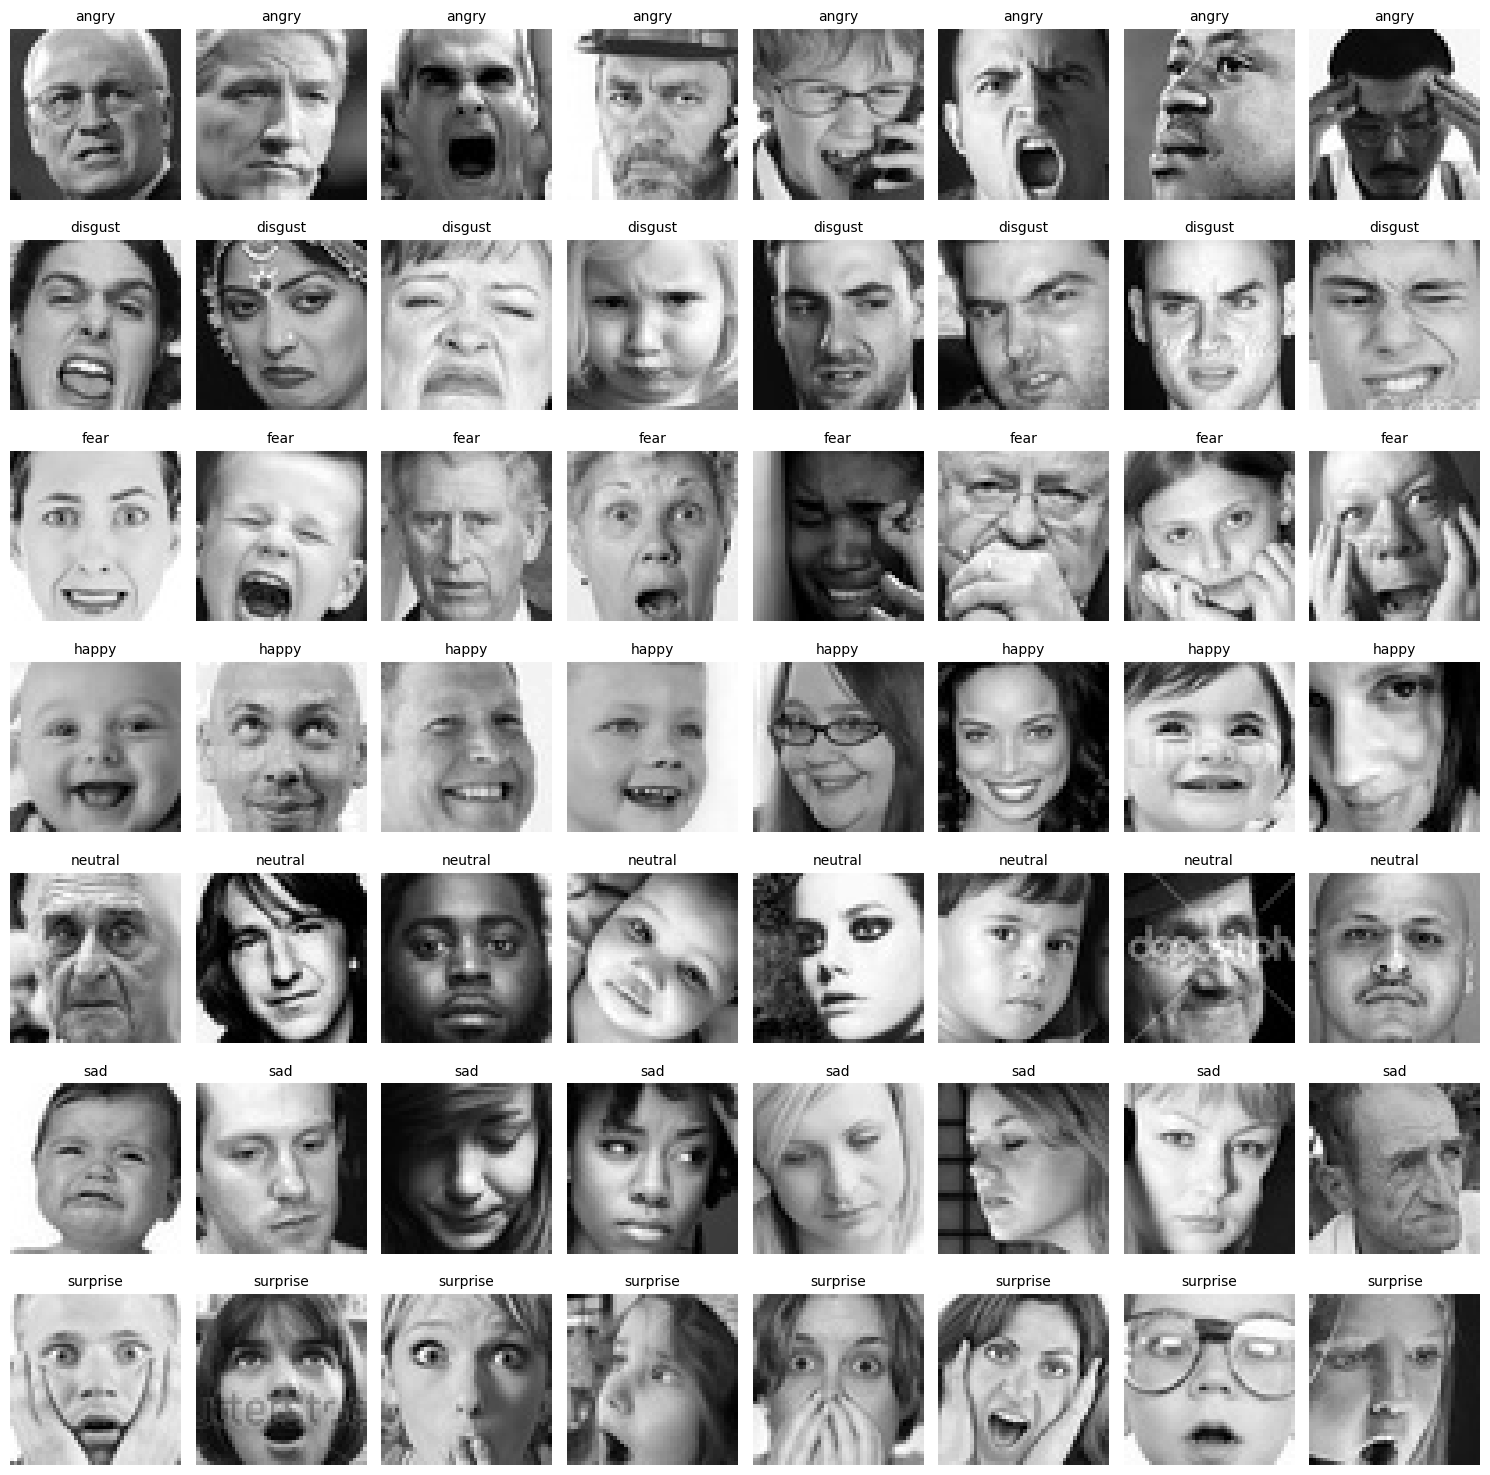

In [84]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sample_images(images, labels, num_samples):
    # Get unique labels and initialize the plot counter
    class_names = np.unique(labels)
    plot_count = 1
    
    # Determine the total number of plot rows needed
    num_classes = len(class_names)
    fig = plt.figure(figsize=(15, 15))
    
    for class_name in class_names:
        # Find indices of images belonging to the current class
        class_indices = np.where(labels == class_name)[0][:num_samples]
        for idx in class_indices:
            # Create a subplot for each sample image
            ax = fig.add_subplot(num_classes, num_samples, plot_count)
            ax.imshow(images[idx], cmap='gray')
            ax.axis('off')  # Hide axes ticks
            ax.set_title(class_name, fontsize=10)
            plot_count += 1

    plt.tight_layout()
    plt.show()

# call function
plot_sample_images(train_images, train_labels, num_samples=8)


In [88]:
import plotly.express as px

# Calculate the count of images for each class in the training set
train_class_counts = {class_name: np.sum(train_labels == class_name) for class_name in np.unique(train_labels)}

# Create a bar chart using Plotly Express for training set only
fig = px.bar(x=list(train_class_counts.keys()), y=list(train_class_counts.values()), color=list(train_class_counts.keys()))

# Customize the layout of the chart
fig.update_layout(
    title="Total samples for each class (Training set distribution)",
    xaxis_title="Label",
    yaxis_title="Count"
)
fig.update_traces(texttemplate='%{y}', textposition='inside')  # Display count labels on the bars

# Show the plot
fig.show()

## Bulding Deep Learning model with 5-layer of convolutional neural network

### import library

In [85]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

2.1.2
False
